In [156]:
import numpy as np
import pandas as pd

In [157]:
file_path = r'C:\Users\ghoas\OneDrive\Desktop\excel sheets\Kmeans\income.csv'

In [158]:
data= pd.read_csv(file_path)
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0.5, 1.0, 'Analysis')

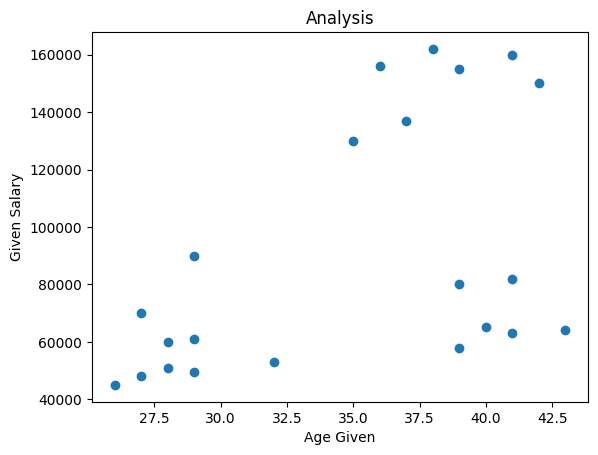

In [159]:
#by datapoint find categories 
#maybe there is group whose salary is low vs high 
#lets find some characteristics here


from matplotlib import pyplot as plt

plt.scatter(x=data.Age,y=data['Income($)'])
plt.xlabel("Age Given")
plt.ylabel("Given Salary")
plt.title("Analysis")

In [160]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5)
km

KMeans(n_clusters=5)

In [161]:
# drop Name and fit predict remainings
y_predicted = km.fit_predict(data.drop(['Name'],axis='columns'))
y_predicted


#now here we can see 3 cluster k = 0, 1 ,2 

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 3, 3, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [162]:
#append witht the table
data['cluster'] = y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [163]:
data1 = data[data.cluster  == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]
data4 = data[data.cluster == 3]
data5 = data[data.cluster == 4]

#mnow we have 3 different dataframe each with different cluster

C:\Users\ghoas\AppData\Local\Temp\ipykernel_23540\1777421922.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


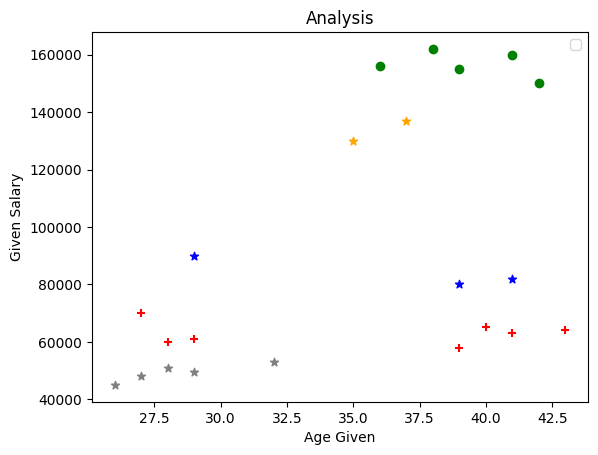

In [164]:
# scatter plt all
plt.scatter(x=data1.Age, y=data1['Income($)'],color="green",marker="o")
plt.scatter(x=data2.Age, y=data2['Income($)'], color="red", marker="+")

plt.scatter(x=data3.Age, y=data3['Income($)'], color="blue",marker ="*")
plt.scatter(x=data4.Age, y=data4['Income($)'], color="orange", marker="*")
plt.scatter(x=data5.Age, y=data5['Income($)'], color="gray", marker="*")

plt.xlabel("Age Given")
plt.ylabel("Given Salary")
plt.title("Analysis")
plt.legend()

In [184]:
#this section comes at last  without scaler used. In  this we have used by predciteing through scalar values 


km = KMeans(n_clusters=3, random_state=42)
# Step 3: Scale the new data point (age=20, income=5000) separately
km.fit(data[['Age', 'Income($)']])



# Combine scaled features into a single 2D array
new_point = [[20,5300]]

# Step 4: Predict the cluster for the new point
predicted_cluster = km.predict(new_point)

print(f"The new data point belongs to cluster: {predicted_cluster[0]}")

The new data point belongs to cluster: 0


c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# here the clusters are not uniformly dicided the dataset so we can do 1 more step to scale datasets
# use preprocessor to minmax so that the scalling of age and slary be properly

from sklearn.preprocessing import MinMaxScaler

scaler_age = MinMaxScaler()
scaler_income = MinMaxScaler()

# now mimax try to scale income to 0 to 1
scaler_income.fit(data[['Income($)']])

MinMaxScaler()

In [167]:
#scubstitutte the minmax scale in the income colummne

data['Income($)'] = scaler_income.transform(data[['Income($)']])
data.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0


In [168]:
#income is scalled in range of 1 to 0
# now do same for age too
scaler_age.fit(data[['Age']])
data['Age'] = scaler_age.transform(data[['Age']])

In [169]:
data.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [170]:
#use Kmeans to train our scale
km =KMeans(n_clusters=5)
y_predicted = km.fit_predict(data.drop(['Name','cluster'],axis='columns'))
y_predicted

array([3, 3, 3, 3, 4, 4, 4, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [171]:
data['cluster'] = y_predicted
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,3
1,Michael,0.176471,0.384615,3
2,Mohan,0.176471,0.136752,3
3,Ismail,0.117647,0.128205,3
4,Kory,0.941176,0.897436,4


In [172]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]
data4 = data[data.cluster == 3]
data5 = data[data.cluster == 4]

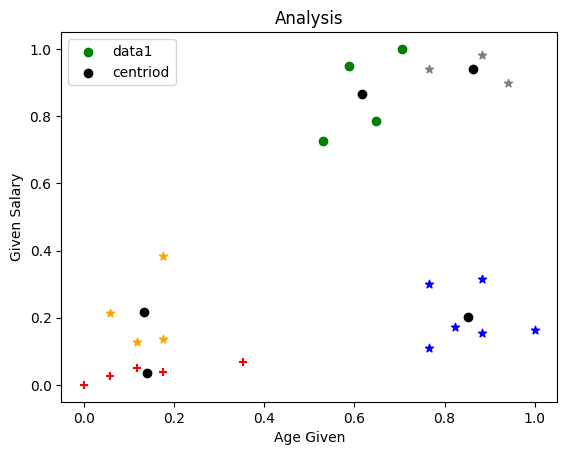

In [173]:
#plot again

# scatter plt all
plt.scatter(x=data1.Age, y=data1['Income($)'], color="green", marker="o",label='data1')
plt.scatter(x=data2.Age, y=data2['Income($)'], color="red", marker="+")

plt.scatter(x=data3.Age, y=data3['Income($)'], color="blue", marker="*")
plt.scatter(x=data4.Age, y=data4['Income($)'], color="orange", marker="*")
plt.scatter(x=data5.Age, y=data5['Income($)'], color="gray", marker="*")

#centrid


# km.cluster_centers_ gives [[0.85294118, 0.2022792 ],       [0.1372549 , 0.11633428],       [0.72268908, 0.8974359 ]])
#x=[:,0] = go through all 3 datassets and take 1st variable as a row, y =[:1] take 2nd one as y

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black', label ='centriod')
plt.xlabel("Age Given")
plt.ylabel("Given Salary")
plt.title("Analysis")
plt.legend()

In [174]:
km.cluster_centers_
#thises are the centroid points for each clusters 0 1 2

array([[0.61764706, 0.86538462],
       [0.14117647, 0.03675214],
       [0.85294118, 0.2022792 ],
       [0.13235294, 0.21581197],
       [0.8627451 , 0.94017094]])

In [175]:

#now time for elbow plt method

k_range = range(1,10)
sse= []

#find sse for all k's
 
for k in k_range:
 #each iteration new model diff cluster
 km = KMeans(n_clusters= k)
 #fit model 
 km.fit(data[['Age','Income($)']])
 #apppend the SSE of all diff k's
 sse.append(km.inertia_)#_inertia gives the sum of square error
 print("relation beteen k , km and sse {}{}{}".format(k, km, km.inertia_))

relation beteen k , km and sse 1KMeans(n_clusters=1)5.434011511988179
relation beteen k , km and sse 2KMeans(n_clusters=2)2.091136388699078
relation beteen k , km and sse 3KMeans(n_clusters=3)0.4750783498553096
relation beteen k , km and sse 4KMeans(n_clusters=4)0.36986589192348335
relation beteen k , km and sse 5KMeans(n_clusters=5)0.34410273486467063
relation beteen k , km and sse 6KMeans(n_clusters=6)0.2244333448724142
relation beteen k , km and sse 7KMeans(n_clusters=7)0.18311629202780538
relation beteen k , km and sse 8KMeans()0.1506574098358324
relation beteen k , km and sse 9KMeans(n_clusters=9)0.12495051760718816


In [176]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.36986589192348335,
 0.34410273486467063,
 0.2244333448724142,
 0.18311629202780538,
 0.1506574098358324,
 0.12495051760718816]

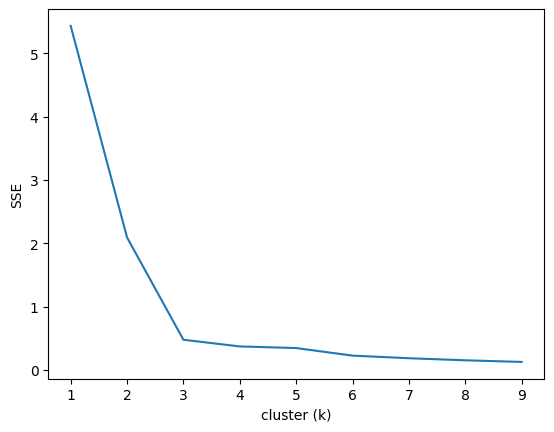

In [177]:


#plot sse 
plt.xlabel('cluster (k)')
plt.ylabel('SSE')
plt.plot(k_range,sse)

In [178]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,3
1,Michael,0.176471,0.384615,3
2,Mohan,0.176471,0.136752,3
3,Ismail,0.117647,0.128205,3
4,Kory,0.941176,0.897436,4


In [179]:

#llokking th plot the elbow point is  in k 3 so cluster3 is required to divide

# predict
# use Kmeans to train our scale
X= data.Age
y=data[['Income($)']]
km = KMeans(n_clusters=3, random_state=42)
km.fit(data[['Age','Income($)']])

KMeans(n_clusters=3, random_state=42)

In [187]:
# Step 3: Scale the new data point (age=20, income=5000) separately
new_age_scaled = scaler_age.transform([[20]])[0][0]
new_income_scaled = scaler_income.transform([[5000]])[0][0]

# Combine scaled features into a single 2D array
new_point = [[new_age_scaled, new_income_scaled]]

# Step 4: Predict the cluster for the new point
predicted_cluster = km.predict(new_point)

print(f"The new data point belongs to cluster: {predicted_cluster[0]}")

The new data point belongs to cluster: 1


c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\ghoas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
